<a href="https://colab.research.google.com/github/0scardavi/famosadesconocida/blob/master/Clase_Word_Cloud_y_Modelado_de_topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerias

In [ ]:
!pip install wordcloud
!pip install langdetect


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")
from nltk.corpus import stopwords
misstop=stopwords.words("spanish")+["á","Y"]
from langdetect import detect
import re
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cargar Datos

In [ ]:
df = pd.read_csv("/content/ecuador_crisis4 (3).csv",sep=',')

In [ ]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1833348087298863508,Tue Sep 10 03:33:40 +0000 2024,3707,#Apagones #CartónNoboa #Ecuador #Vilmatraca ht...,1833348087298863508,https://pbs.twimg.com/media/GXFcXsgX0AAUT6j.jpg,NaN,qme,NaN,51,159,1966,https://x.com/vilmavargasva/status/18333480872...,2286822792,vilmavargasva
1,1832425111573443044,Sat Sep 07 14:26:06 +0000 2024,22,#apagones Se reporta apagones en todo el Ecuad...,1832425111573443044,https://pbs.twimg.com/media/GW4U7ZaW4AEz8iF.jpg,NaN,es,Ecuador,0,9,9,https://x.com/nathalielandeta/status/183242511...,2443117965,nathalielandeta
2,1832431643065245958,Sat Sep 07 14:52:03 +0000 2024,156,Todo el Ecuador en este momento: #apagones htt...,1832431643065245958,https://pbs.twimg.com/media/GW4a3YhWUAAzC1I.jpg,NaN,es,NaN,1,1,27,https://x.com/KrmenGutierrezP/status/183243164...,197806798,KrmenGutierrezP
3,1832551236119187854,Sat Sep 07 22:47:16 +0000 2024,38,¡Ecuador #SinLuz! Mientras tanto los Florindos...,1832551236119187854,https://pbs.twimg.com/media/GW6Ho1YXQAAYReM.jpg,NaN,es,Santa Ana - Manabí - Ecuador,0,1,9,https://x.com/IngridBravoRuiz/status/183255123...,954821474,IngridBravoRuiz
4,1832463362820571460,Sat Sep 07 16:58:05 +0000 2024,30,Página web y presidente ninguno sirve. #apagon...,1832463362820571460,https://pbs.twimg.com/media/GW43t55WkAAEKur.jpg,NaN,es,"Quito, Ecuador",0,3,26,https://x.com/ElPanaEc/status/1832463362820571460,3341239450,ElPanaEc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1820285337110786200,Mon Aug 05 02:26:58 +0000 2024,955,Una vez que se supere la crisis @EnelChile no ...,1820285337110786200,NaN,NaN,es,"Santiago, Chile",14,151,319,https://x.com/isidoraalcalde/status/1820285337...,126730901,isidoraalcalde
201,1821559040586981583,Thu Aug 08 14:48:12 +0000 2024,1833,¡Lo que hay que leer! Hasta la década de los 9...,1821559040586981583,NaN,NaN,es,NaN,17,67,880,https://x.com/DiegoMesaP/status/18215590405869...,1050230947927523328,DiegoMesaP
202,1833122826292703243,Mon Sep 09 12:38:34 +0000 2024,268,¿Esta gente es así de tonta o en los comités s...,1833122826292703243,NaN,NaN,es,NaN,1,32,85,https://x.com/luisesgo/status/1833122826292703243,40458187,luisesgo
203,1833101245071933552,Mon Sep 09 11:12:48 +0000 2024,944,Eléctricas anticipan cortes de luz en el veran...,1833101245071933552,NaN,NaN,es,"Buenos Aires, Argentina",102,30,377,https://x.com/AlanLongy/status/183310124507193...,173888869,AlanLongy


## Preprocesamiento de datos

In [ ]:
# Function to detect the language of a text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Apply the language detection function to the 'text' column of your DataFrame
df['language'] = df['full_text'].apply(detect_language)

# Filter out rows where the detected language is not Spanish
df = df[df['language'] == 'es']


In [ ]:
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|#"," ",x).split()))

<ipython-input-35-be8b2ca8e91a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|#"," ",x).split()))


In [ ]:

df['words_tokenize'] = df.apply(lambda row: nltk.word_tokenize(row['full_text'],language='spanish'), axis=1)

df['words_tokenize'] = df.apply(lambda row: nltk.Text(row['words_tokenize']),axis=1)

df['words_tokenize'] = df['words_tokenize'].apply(lambda x: [item for item in x if item not in misstop])

df['words_tokenize'] = df['words_tokenize'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


wordnet_lem = WordNetLemmatizer()

df['words_tokenize'] = df['words_tokenize'].apply(wordnet_lem.lemmatize)


df['words_tokenize'] = df['words_tokenize'].str.lower()

<ipython-input-10-d5f6fc11edf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_tokenize'] = df.apply(lambda row: nltk.word_tokenize(row['full_text'],language='spanish'), axis=1)
<ipython-input-10-d5f6fc11edf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_tokenize'] = df.apply(lambda row: nltk.Text(row['words_tokenize']),axis=1)
<ipython-input-10-d5f6fc11edf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Visualizacion nube de palabras

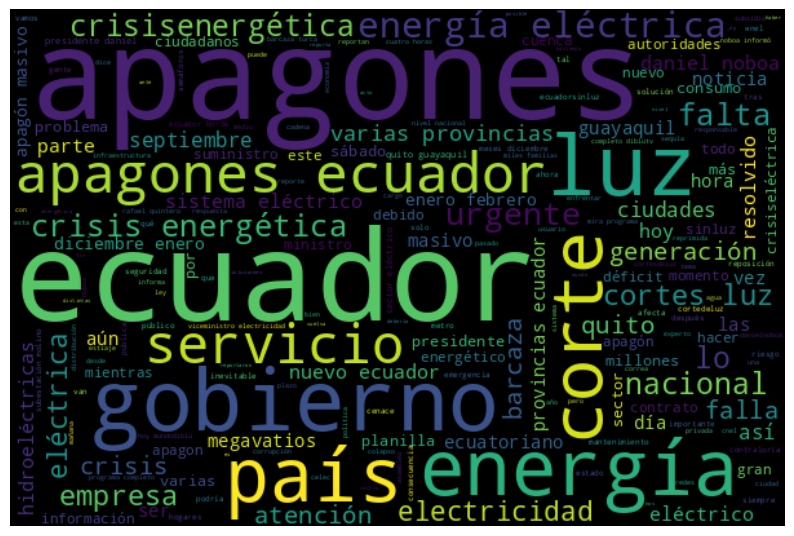

In [ ]:

all_words = ' '.join([word for word in df['words_tokenize']])


%matplotlib inline


wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## Modelado de Topicos

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from umap import UMAP
from sklearn.cluster import KMeans
import string

# Cargar el modelo y tokenizer de BERT en español
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Función para obtener embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

# Función para filtrar textos no deseados
def is_valid_text(text):
    # Eliminar textos vacíos
    if not text.strip():
        return False
    # Eliminar textos con solo emojis o caracteres especiales
    if all(char in string.punctuation or char.isspace() for char in text):
        return False
    # Eliminar textos repetitivos
    if len(set(text.split())) <= 3:
        return False
    return True

# Aplicar filtro de textos válidos
df = df[df['words_tokenize'].apply(is_valid_text)]

# Aplicar la función para obtener embeddings a cada fila en el DataFrame
df['embeddings'] = df['words_tokenize'].apply(lambda x: get_embeddings(x)[0])

# Convertir embeddings en una matriz
embeddings_matrix = np.vstack(df['embeddings'].values)

# Reducir la dimensionalidad con UMAP
umap = UMAP(n_components=5, random_state=42)
reduced_embeddings = umap.fit_transform(embeddings_matrix)


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


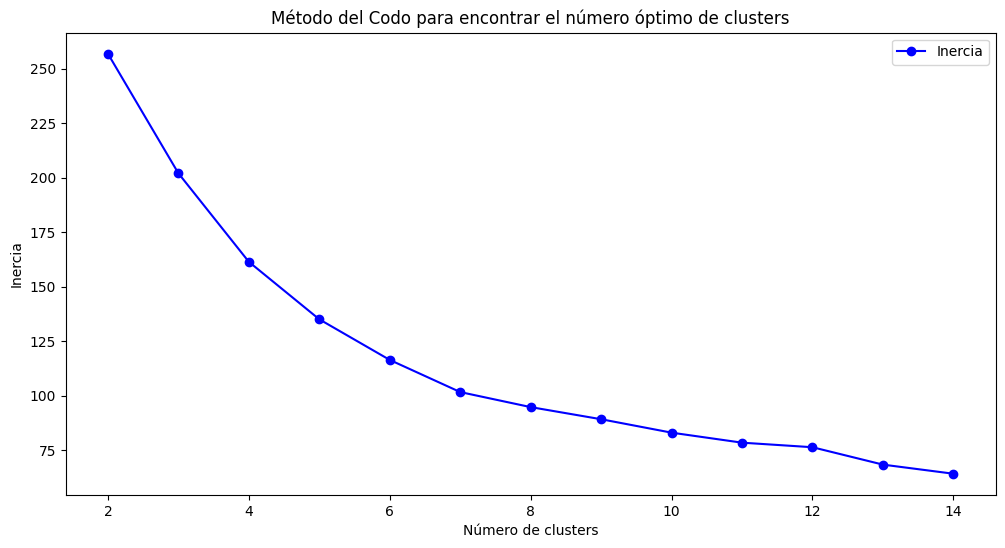

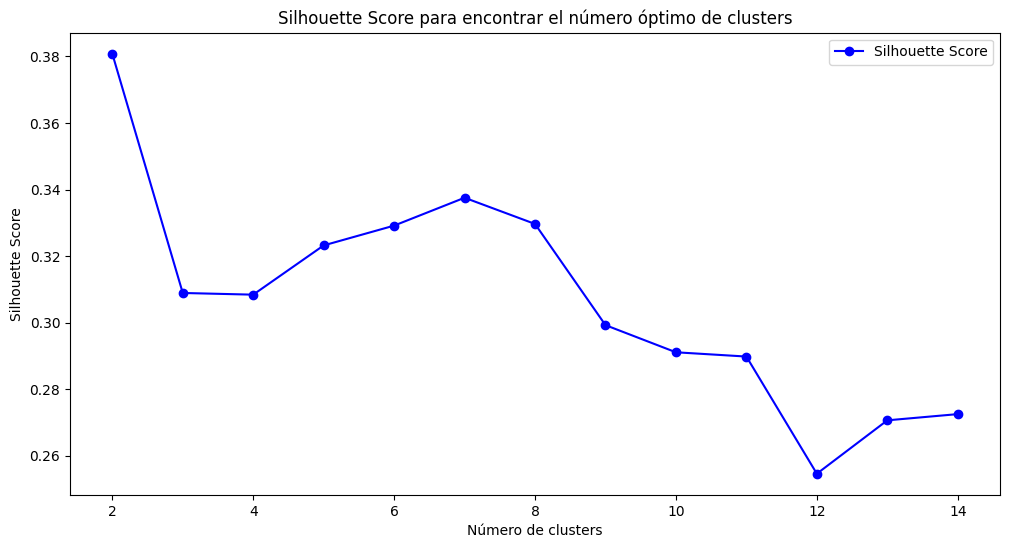

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista para guardar las inercia de cada número de clusters
inertias = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_embeddings)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_embeddings, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(12, 6))
plt.plot(K, inertias, 'bo-', label='Inercia')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.legend()
plt.show()

# Graficar el método de la silueta
plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para encontrar el número óptimo de clusters')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Cluster embeddings
kmeans = KMeans(n_clusters=9, random_state=42).fit(reduced_embeddings)
df['topic'] = kmeans.labels_


In [ ]:
for topic_id in sorted(df['topic'].unique()):
    print(f"Topic {topic_id}\n")
    print(df[df['topic'] == topic_id]['full_text'].head(5))  # Print first 5 texts of each topic
    print("\n---\n")


Topic 0

0               Apagones CartónNoboa Ecuador Vilmatraca
4     Página web y presidente ninguno sirve. apagone...
7     Se va la luz en todo el Ecuador 🇪🇨 Anticorreis...
11    Se va la luz en todo el Ecuador 🇪🇨 Anticorreis...
32    🆕 HOY en MundoDiblu Problemas para anclar la b...
Name: full_text, dtype: object

---

Topic 1

28    Usuario: _EP no hay energía en medio Ecuador.....
36    CENACE comunicó que los cortes de luz en el pa...
40    Con la crisis energética en Ecuador ¡es hora d...
52    Exigimos que se reponga cuanto antes el servic...
96    Ingresa en este momento por el zoom: Israel Si...
Name: full_text, dtype: object

---

Topic 2

13    Ante la crisis energética que sufre Ecuador y ...
16    Lo que pedimos 🆚 Lo que recibimos: Versión Cri...
19    El cartón Roboa🇪🇨 promete pagar las facturas d...
22    ForoEnergético2024. Agradecido por la enorme a...
24    Las Fuerzas Armadas y la Policía Nacional oper...
Name: full_text, dtype: object

---

Topic 3

23    URGENTE

In [ ]:
from umap import UMAP
import numpy as np

# Assuming embeddings_matrix contains all your embeddings
reduced_embeddings_2d = UMAP(n_components=2).fit_transform(embeddings_matrix)

# Add these reduced dimensions to your DataFrame
df['x'] = reduced_embeddings_2d[:, 0]
df['y'] = reduced_embeddings_2d[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


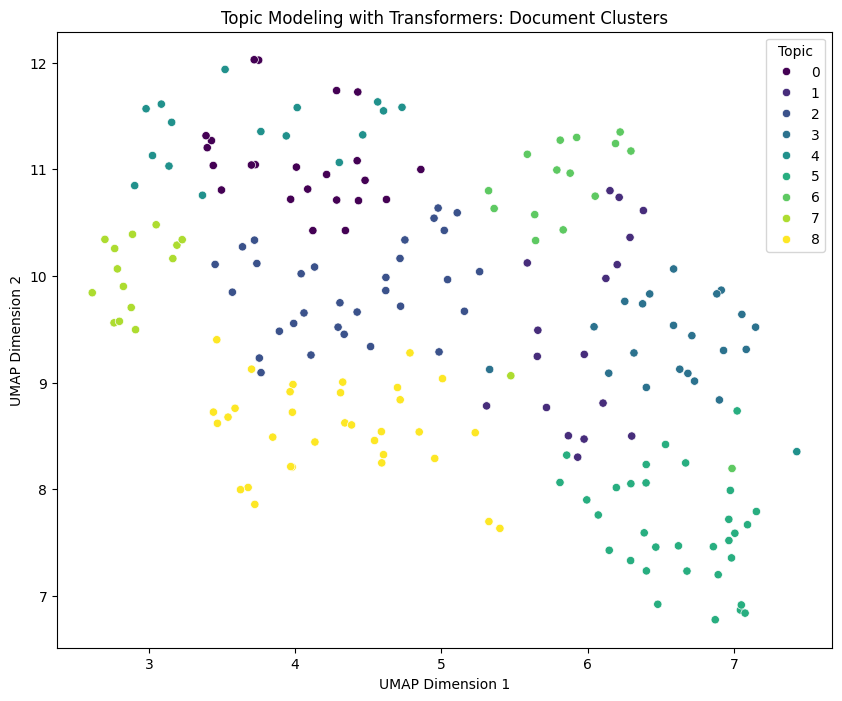

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='topic', palette='viridis', legend='full')
plt.title('Topic Modeling with Transformers: Document Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Topic')
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame with a 'topic' column
for topic in sorted(df['topic'].unique()):
    print(f"Topic {topic}:\n")
    # Get a few sample texts from each topic
    sample_texts = df[df['topic'] == topic]['full_text'].sample(n=5, random_state=42)
    for i, text in enumerate(sample_texts, 1):
        print(f"Text {i}: {text}\n")
    print("---\n")


Topic 0:

Text 1: Ustedes Mijines están de acuerdo en que el Presi Adelante 1 Hora el horario del Ecuador como en tiempos de Sixto Durán Ballen hasta que dure la crisis energética ..??? SinLuz apagones Vota y RT

Text 2: 🆕 HOY en MundoDiblu Los planes para atender la crisis energética ️ Iván Endara ( ) docente de ingeniería en electricidad de la Espol Mira el programa completo en DibluTV Ecuador apagones luz politica

Text 3: Apagones CartónNoboa Ecuador Vilmatraca

Text 4: Ecuador sin luz apagones y sin gobierno Resolvido

Text 5: Sábado sin luz el nuevo Ecuador apagones

---

Topic 1:

Text 1: Usuario: _EP no hay energía en medio Ecuador... CNEL: ni idea que paso pero en un ratito le regresa el servicio Trolls: usando esto de forma política PobreEcuador apagones

Text 2: CENACE comunicó que los cortes de luz en el país son debido a una falla en la barra de la subestación Molino que está conectada a la generación de Paute. Estiman entre 3 y 4 horas más sin suministro de energía. urgen

In [ ]:
df_0 = df[df['topic']==0]
df_1 = df[df['topic']==1]
df_2 = df[df['topic']==2]
df_3 = df[df['topic']==3]


In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

# Descargar stopwords si no lo has hecho ya
nltk.download('stopwords')
nltk.download('punkt')

# Definir stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
punctuation = set(string.punctuation)

# Lista de palabras no deseadas específicas
additional_stop_words = {'https', 'co', 'RT', 'rt', 't', 'u','q'}

# Función para limpiar y tokenizar texto
def clean_tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words
              and word.lower() not in additional_stop_words
              and word not in punctuation]
    return tokens


# Verifica y limpia los datos en los DataFrames
df_0['full_text'] = df_0['full_text'].astype(str)
df_1['full_text'] = df_1['full_text'].astype(str)
df_2['full_text'] = df_2['full_text'].astype(str)
df_3['full_text'] = df_3['full_text'].astype(str)

# Tokenize and calculate frequency for actor 1
all_words_pr1 = ' '.join([text for text in df_0['full_text']])
all_words_pr1 = clean_tokenize_text(all_words_pr1)

fdist1 = FreqDist(all_words_pr1)

# Tokenize and calculate frequency for actor 2
all_words_pr2 = ' '.join([text for text in df_1['full_text']])
all_words_pr2 = clean_tokenize_text(all_words_pr2)

# Tokenize and calculate frequency for actor 2
all_words_pr3 = ' '.join([text for text in df_2['full_text']])
all_words_pr3 = clean_tokenize_text(all_words_pr3)

# Tokenize and calculate frequency for actor 2
all_words_pr4 = ' '.join([text for text in df_3['full_text']])
all_words_pr4 = clean_tokenize_text(all_words_pr4)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-bf64e0e0b714>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['full_text'] = df_0['full_text'].astype(str)
<ipython-input-27-bf64e0e0b714>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['full_text'] = df_1['full_text'].astype(str)
<ipython-input-27-

<ipython-input-28-f060251c7388>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


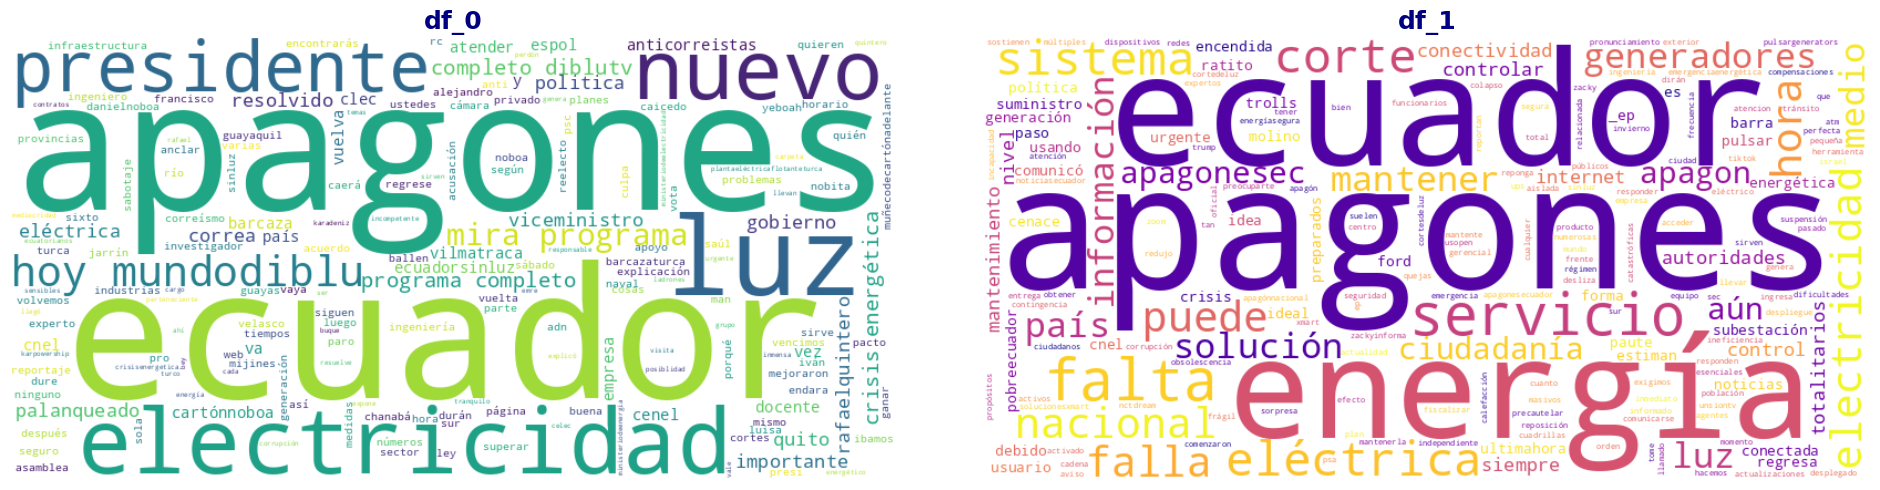

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una imagen de Word Cloud con diferentes paletas de colores
wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(all_words_pr1))
wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(' '.join(all_words_pr2))

# Visualizar Word Cloud
fig, axs = plt.subplots(1, 2, figsize=(24, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0})

axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('df_0', fontsize=18, fontweight='bold', color='navy')

axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('df_1', fontsize=18, fontweight='bold', color='navy')



# Añadir bordes a los gráficos
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


<ipython-input-29-410038e3ccd2>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


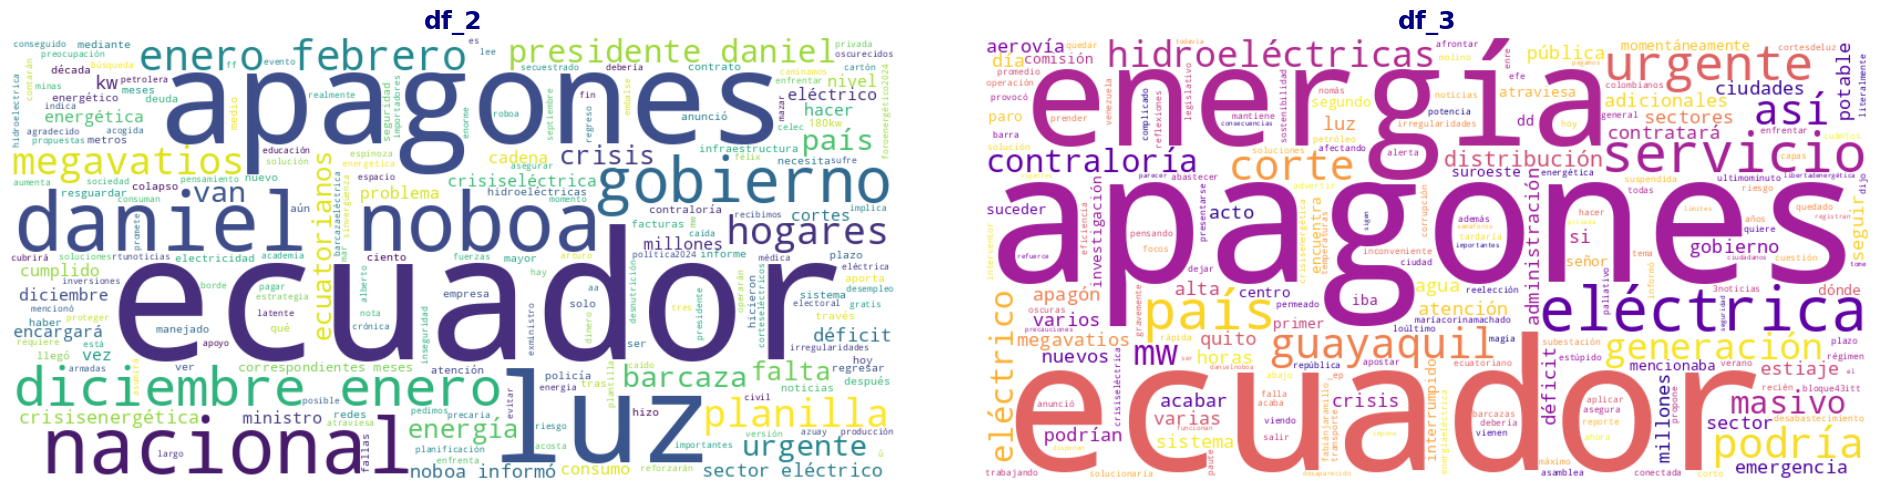

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una imagen de Word Cloud con diferentes paletas de colores
wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(all_words_pr3))
wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(' '.join(all_words_pr4))

# Visualizar Word CloudAC
fig, axs = plt.subplots(1, 2, figsize=(24, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0})

axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('df_2', fontsize=18, fontweight='bold', color='navy')

axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('df_3', fontsize=18, fontweight='bold', color='navy')



# Añadir bordes a los gráficos
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()
